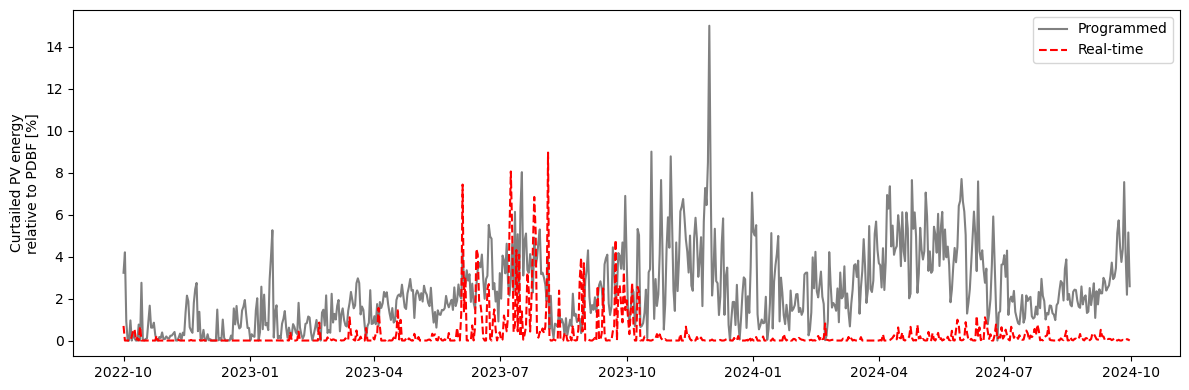

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"
df = pd.read_csv(file_path)

# Convert timestamp to datetime
df['new_index'] = pd.to_datetime(df['new_index'])

# Set timestamp as index
df.set_index('new_index', inplace=True)

# Resample to daily sum (assuming hourly data)
daily_data = df.resample('D').sum()

# Take absolute values before percentage calculation
daily_data['Programmed_%'] = 100 * abs(daily_data['I3DIA03']) / daily_data['I3DIA14']
daily_data['Real_time_%'] = 100 * abs(daily_data['I3DIA08']) / daily_data['I3DIA14']

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(daily_data.index, daily_data['Programmed_%'], color='gray', label='Programmed')
plt.plot(daily_data.index, daily_data['Real_time_%'], 'r--', label='Real-time')
plt.ylabel('Curtailed PV energy\nrelative to PDBF [%]')
plt.legend()
plt.tight_layout()

# Save the figure
save_path = r"C:\Users\hp\Desktop\New_paper\New_Thesis\curtailment_plot.png"
plt.savefig(save_path, dpi=300)

# Optionally show the plot too
plt.show()


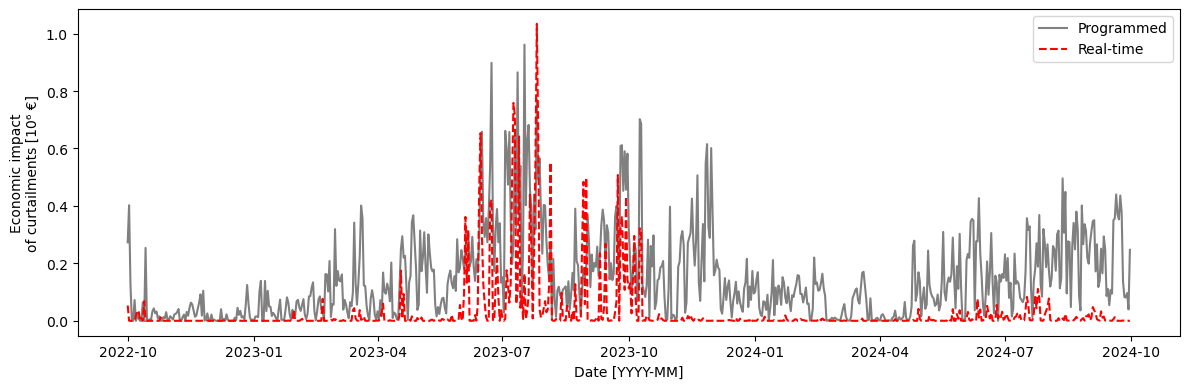

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"
df = pd.read_csv(file_path)

# Convert to datetime
df['new_index'] = pd.to_datetime(df['new_index'])
df.set_index('new_index', inplace=True)

# Calculate hourly economic impact
df['programmed_impact'] = abs(df['I3DIA03']) * df['price']
df['realtime_impact'] = abs(df['I3DIA08']) * df['price']

# Resample to daily sum and convert to millions (€)
daily_impact = df[['programmed_impact', 'realtime_impact']].resample('D').sum() / 1e6

# Plot
plt.figure(figsize=(12, 4))
plt.plot(daily_impact.index, daily_impact['programmed_impact'], color='gray', label='Programmed')
plt.plot(daily_impact.index, daily_impact['realtime_impact'], 'r--', label='Real-time')
plt.ylabel('Economic impact\nof curtailments [10⁶ €]')
plt.xlabel('Date [YYYY-MM]')
plt.legend()
plt.tight_layout()

# Save the plot
save_path = r"C:\Users\hp\Desktop\New_paper\New_Thesis\economic_impact_plot.png"
plt.savefig(save_path, dpi=300)
plt.show()


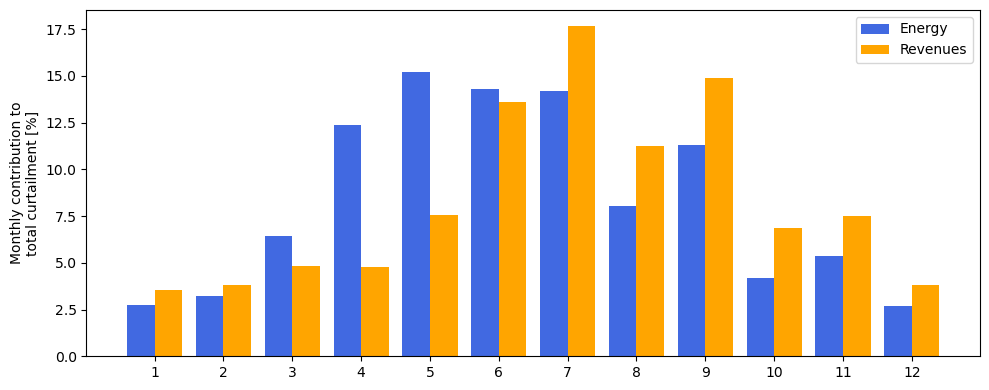

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"
df = pd.read_csv(file_path)

# Convert to datetime and set index
df['new_index'] = pd.to_datetime(df['new_index'])
df.set_index('new_index', inplace=True)

# Create month column
df['month'] = df.index.month

# Compute monthly total programmed curtailment energy (MWh)
monthly_energy = abs(df['I3DIA03']).groupby(df['month']).sum()

# Compute monthly lost revenue from programmed curtailment (€/MWh * MWh)
monthly_revenue = (abs(df['I3DIA03']) * df['price']).groupby(df['month']).sum()

# Normalize to percentage
energy_pct = 100 * monthly_energy / monthly_energy.sum()
revenue_pct = 100 * monthly_revenue / monthly_revenue.sum()

# Plot grouped bar chart
months = range(1, 13)
bar_width = 0.4

plt.figure(figsize=(10, 4))
plt.bar([m - bar_width/2 for m in months], energy_pct, width=bar_width, label='Energy', color='royalblue')
plt.bar([m + bar_width/2 for m in months], revenue_pct, width=bar_width, label='Revenues', color='orange')

plt.ylabel('Monthly contribution to\ntotal curtailment [%]')
plt.xticks(months)
plt.legend()
plt.tight_layout()

# Save the plot
save_path = r"C:\Users\hp\Desktop\New_paper\New_Thesis\monthly_contribution_plot.png"
plt.savefig(save_path, dpi=300)
plt.show()


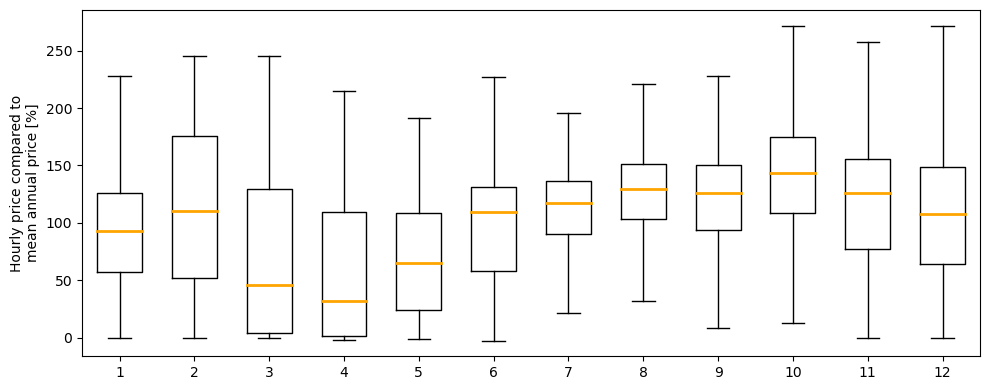

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
file_path = r"C:\Users\hp\Desktop\New_paper\curt.csv"
df = pd.read_csv(file_path)

# Convert to datetime
df['new_index'] = pd.to_datetime(df['new_index'])
df.set_index('new_index', inplace=True)

# Calculate hourly price as % of mean annual price
annual_mean_price = df['price'].mean()
df['relative_price'] = 100 * df['price'] / annual_mean_price

# Extract month from datetime
df['month'] = df.index.month

# Prepare data: group hourly price % by month
monthly_relative_prices = [df[df['month'] == m]['relative_price'].values for m in range(1, 13)]

# Plot boxplot
plt.figure(figsize=(10, 4))
plt.boxplot(
    monthly_relative_prices,
    showfliers=False,           # Hide outliers
    widths=0.6,
    boxprops=dict(linewidth=1),
    medianprops=dict(color='orange', linewidth=2)
)
plt.xticks(range(1, 13))
plt.ylabel('Hourly price compared to\nmean annual price [%]')
plt.tight_layout()

# Save the figure
save_path = r"C:\Users\hp\Desktop\New_paper\New_Thesis\monthly_price_boxplot.png"
plt.savefig(save_path, dpi=300)
plt.show()
